(a) Compute the waveform of the PAM signal s(t):

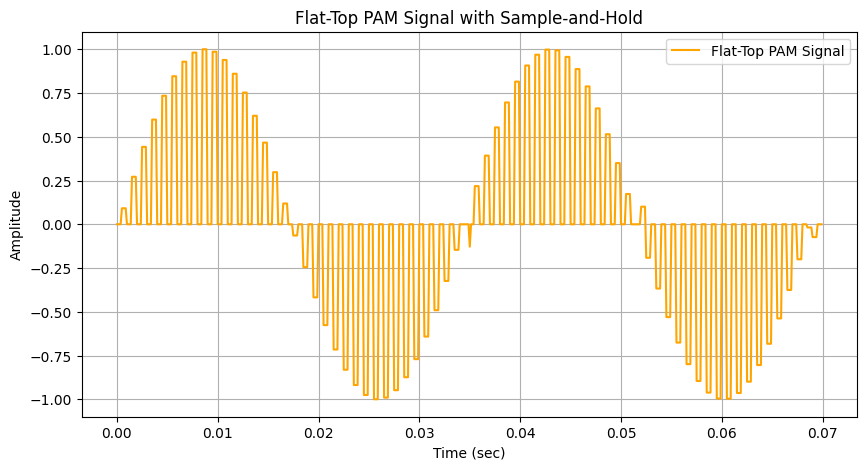

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def flat_top_pam_signal(fs, f0, T, flat_top_duration, duration):
    t = np.arange(0, duration, 1/fs)
    signal = np.sin(2 * np.pi * f0 * t)

    samples_per_period = int(fs * T)
    flat_top_samples = int(fs * flat_top_duration)

    pam_signal = np.zeros_like(t)

    for i in range(0, len(t), samples_per_period):
        flat_top_start = i + int((samples_per_period - flat_top_samples) / 2)
        flat_top_end = flat_top_start + flat_top_samples
        pam_signal[flat_top_start:flat_top_end] = signal[i]

    for i in range(len(pam_signal)):
        if (pam_signal[i] < 0 and i<140):
            pam_signal[i] = 0
        

        if (pam_signal[i] < 0 and (i>280 and i <420)):
            pam_signal[i] = 0

        if (pam_signal[i] > 0 and (i>140 and i <280)):
            pam_signal[i] = 0
        if (pam_signal[i] > 0 and i>420 ):
            pam_signal[i] = 0
        


    return t, pam_signal

# Parameters
fs = 8000  # Sampling frequency in Hz
f0 = 10000 / (2 * np.pi)  # Frequency of the sinusoidal signal in Hz
T = 500e-6  # Pulse duration in seconds
flat_top_duration = T  # Duration of flat-top sampling
duration = 0.07  # Total duration of the signal in seconds

# Generate flat-top PAM signal
t_pam, pam_signal = flat_top_pam_signal(fs, f0, T, flat_top_duration, duration)

# Plot the flat-top PAM signal
plt.figure(figsize=(10, 5))
plt.plot(t_pam, pam_signal, label='Flat-Top PAM Signal', color='orange')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.title('Flat-Top PAM Signal with Sample-and-Hold')
plt.legend()
plt.grid(True)
plt.show()


(b) Compute |S(f)|, denoting the magnitude spectrum of the PAM signal s(t):

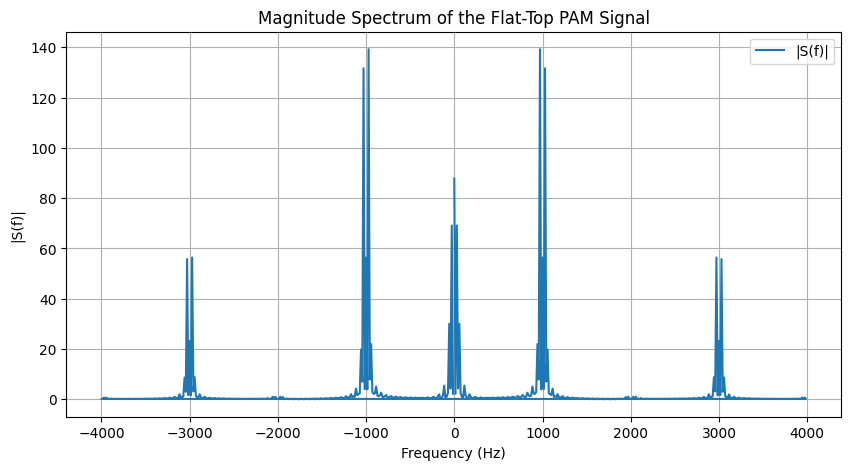

In [4]:
from scipy.fft import fft

# Compute the FFT of the PAM signal
N = len(t_pam)
frequencies = np.fft.fftfreq(N, 1/fs)
spectrum = fft(pam_signal)
magnitude_spectrum = np.abs(spectrum)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies, magnitude_spectrum, label='|S(f)|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S(f)|')
plt.title('Magnitude Spectrum of the Flat-Top PAM Signal')
plt.legend()
plt.grid(True)
plt.show()


(c) Compute the envelope of |S(f)| and confirm the frequency at which it goes through zero for the first time:

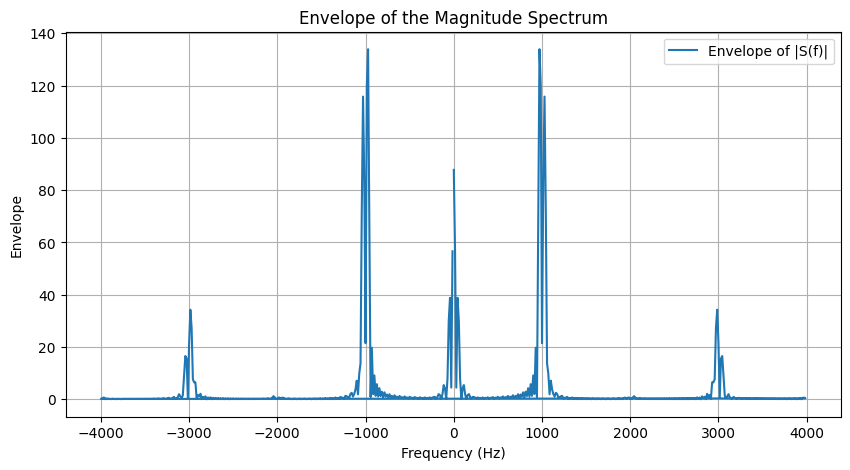

No zero-crossings found in the envelope.


In [5]:
from scipy.signal import hilbert

# Compute the envelope of |S(f)|
analytic_signal = hilbert(np.real(spectrum))
envelope = np.abs(analytic_signal)

# Plot the envelope
plt.figure(figsize=(10, 5))
plt.plot(frequencies, envelope, label='Envelope of |S(f)|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Envelope')
plt.title('Envelope of the Magnitude Spectrum')
plt.legend()
plt.grid(True)
plt.show()

# Find the frequency at which the envelope goes through zero for the first time
zero_crossings = np.where(np.diff(np.sign(envelope)))[0]
if len(zero_crossings) > 0:
    first_zero_frequency = frequencies[zero_crossings[0]]
    print(f'The frequency at which the envelope goes through zero for the first time: {first_zero_frequency} Hz')
else:
    print('No zero-crossings found in the envelope.')
